<a href="https://colab.research.google.com/gist/Dtays-meanderings/d553f758f462d7e87e865408a357504f/torus_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objects as go
import math

R = 20      # Major radius
r = 5       # Minor radius
c = 40-r   # Cyinder radius minus torus minor
rd = 10     # Discretize resolution (must be 180%rd=0 and < 90)

ts = 90     # Torus minor radius angle start
te = 180    # Torus minor radius angle end

#lists
x, y, z = [], [], []          #torus
cx1, cy1, cz1 = [], [], []    #circle1
cx2, cy2, cz2 = [], [], []    #circle2
tx, ty, tz = [], [], []       #torus points
nx, ny, nz = [], [], []       #torus root normals

# Vector to rotate
v = [0.0, 0.0, r]

for q_index in range(-90 // rd, 0):
    qi = math.radians(q_index * rd)
    for h in range(0, 360 // rd):
        ang = math.radians(h * rd)

        # Calculate partial derivative (slope) at the center of the toroidal rotation axis +/-.0001 of a radian
        fx = R * math.cos(ang+0.0001)
        px = R * math.cos(ang-0.0001)
        fy = R * math.sin(ang+0.0001)
        py = R * math.sin(ang-0.0001)
        fz = math.sqrt(c**2 - fy**2)
        pz = math.sqrt(c**2 - py**2)

        mn = math.sqrt((fx - px)**2 + (fy - py)**2 + (fz - pz)**2)  # Get magnitude

        # Normalize quaternion rotation vector
        xn = (fx - px) / mn
        yn = (fy - py) / mn
        zn = (fz - pz) / mn

        # Calculate single position of torus center/root
        xc = R * math.cos(ang)           # X1
        yc = R * math.sin(ang)           # Y1
        zc = math.sqrt(c**2 - yc**2)-c   # Z1

        q = [
            math.cos(qi/2),
            math.sin(qi/2) * xn,
            math.sin(qi/2) * yn,
            math.sin(qi/2) * zn
            ]

        vx = (
            v[0] * (1 - 2 * q[2]**2 - 2 * q[3]**2) +
            v[1] * (2 * q[1] * q[2] - 2 * q[0] * q[3]) +
            v[2] * (2 * q[1] * q[3] + 2 * q[0] * q[2])
        )
        vy = (
            v[0] * (2 * q[1] * q[2] + 2 * q[0] * q[3]) +
            v[1] * (1 - 2 * q[1]**2 - 2 * q[3]**2) +
            v[2] * (2 * q[2] * q[3] - 2 * q[0] * q[1])
        )
        vz = (
            v[0] * (2 * q[1] * q[3] - 2 * q[0] * q[2]) +
            v[1] * (2 * q[2] * q[3] + 2 * q[0] * q[1]) +
            v[2] * (1 - 2 * q[1]**2 - 2 * q[2]**2)
        )
        nx.append(xn)
        ny.append(yn)
        nz.append(zn)
        tx.append(xc)
        ty.append(yc)
        tz.append(zc)
        x.append(xc + vx)
        y.append(yc + vy)
        z.append(zc + vz)

#circles in XZ plane
for c1 in range(360):
    cx1.append(r * math.cos(math.radians(c1)) + R)
    cy1.append(0.0)
    cz1.append(r * math.sin(math.radians(c1)))

for c2 in range(60,120):
    cx2.append(0)
    cy2.append((c+r) * math.cos(math.radians(c2)))
    cz2.append((c+r) * math.sin(math.radians(c2))-c)

torus = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=3, color='blue'), name='Toroid pnts', legendgrouptitle=dict(text='Discretized fillet geo'))
circle = go.Scatter3d(x=cx1, y=cy1, z=cz1, mode='lines', line=dict(color='red', width=5), opacity=0.2, name='circle1')
cyl =  go.Scatter3d(x=cx2, y=cy2, z=cz2, mode='lines', line=dict(color='black', width=1), opacity=1, name='cylinder radius')
rootL =  go.Scatter3d(x=tx, y=ty, z=tz, mode='lines', line=dict(color='yellow', width=5), opacity=0.2, name='Torus root line')
arrow = go.Cone(x=[R], y=[0], z=[0], u=[0], v=[1], w=[0], sizemode="absolute", sizeref=3, showscale=False)


tindex = 183
arrow2 = go.Cone(x=[tx[tindex]], y=[ty[tindex]], z=[tz[tindex]], u=[nx[tindex]], v=[ny[tindex]], w=[nz[tindex]], sizemode="absolute", sizeref=3, showscale=False, name='arrow at root')

layout = go.Layout(scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z'),
        aspectratio=dict(x=1, y=1, z=r/(R+r)) # Scale Z relative to X,Y
    )
)

fig = go.Figure(data=[torus, arrow, circle, cyl, rootL, arrow2], layout=layout)
fig.show()

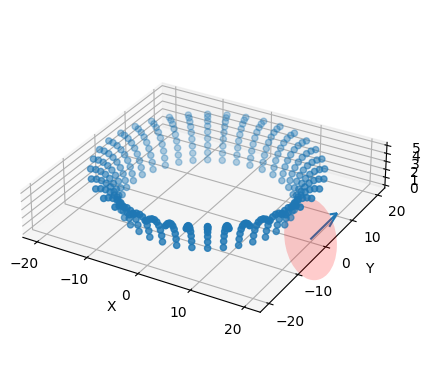

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import math

R = 20      # Major radius
r = 5       # Minor radius
rd = 10     # Discretized resolution (must be 360%rd=0 and < 90)

ts=90      #Torus minor radius angle start
te=180     #Torus minor radius angle end

x, y, z = [], [], []

# Generate points - minor rotations first
for i in range(int(ts/rd),int(te/rd)):
    theta = math.radians(i*rd)

    #increment about Z via 'phi' with major radius and place minor radius points from 90 to 180
    for j in range(int(360/rd)):
        phi = math.radians(j*rd)
        x.append((R + r * math.cos(theta)) * math.cos(phi))
        y.append((R + r * math.cos(theta)) * math.sin(phi))
        z.append(r * math.sin(theta))

cx, cy, cz = [], [], []
for c in range(360):
    cx.append(float(r*math.cos(math.radians(c))))
    cy.append(float(r*math.sin(math.radians(c))))
    cz.append(0.0)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.quiver(R, 0, 0, 0, 1, 0, length=10, normalize=True)
p = Circle((R, 0), r, facecolor = 'r', alpha = .2)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="y")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, r/(R+r)]) #Scale Z according to X/Y

plt.show()